# Lead_Scoring_Casestudy

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

There are quite a few goals for this case study.

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_recall_curve


# To view large output

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)



### Data understanding and loading 

In [2]:
# Importing the dataset
lead_score = pd.read_csv("Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the shape of the dataframe
lead_score.shape

(9240, 37)

In [4]:
# checking the data types of the data frame
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# checking the statistical information of the data frame
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning and inspection

In [6]:
# checking for duplicate values in the unique id's

lead_score.duplicated(subset='Prospect ID').sum()

0

In [7]:
lead_score.duplicated(subset='Lead Number').sum()

0

In [8]:
# Handling 'SELECT' values

lead_score= lead_score.replace('Select', np.nan)


#### insights:There are many columns with Select values and these are as good as null.
    

In [9]:
# checking for null values in the data frame

lead_score.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# checking for null value percentage
lead_score.isna().sum()/len(lead_score)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Removing with more than 40% null values in the columns

In [11]:
# Remvoing columns with more than 40%

cols= lead_score.columns

for i in cols:
    if((100*(lead_score[i].isnull().sum()/len(lead_score.index)))>=40):
        lead_score.drop(i,1, inplace= True)


In [12]:
# checking for null value percentage
lead_score.isna().sum()/len(lead_score)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### Imputing and handling of NAN: Categorical variables

In [13]:
# Handling of nan values in the remaining columns

lead_score['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Sweden                     3
Philippines                2
Ghana                      2
China                      2
Italy                      2
Asia/Pacific Region        2
Belgium                    2
Netherlands                2
Bangladesh                 2
Uganda                     2
Tanzania                   1
Kenya                      1
Denmark                    1
Liberia                    1
Indonesia                  1
Russia        

In [14]:
# since the country India has occured most number of times impute the missing values with the highest mode 

lead_score['Country']=lead_score['Country'].replace(np.nan,'India')

In [15]:
lead_score['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Bangladesh                 2
China                      2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
Philippines                2
Netherlands                2
Belgium                    2
Italy                      2
Denmark                    1
Vietnam                    1
Liberia                    1
Malaysia                   1
Kenya                      1
Indonesia                  1
Russia        

#### insights: country has highly imbalanced values with India representing most of the values

In [16]:
lead_score['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
# since the city Mumbai has occured most number of times impute the missing values with the highest mode 

lead_score['City']=lead_score['City'].replace(np.nan,'Mumbai')

In [18]:
lead_score['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

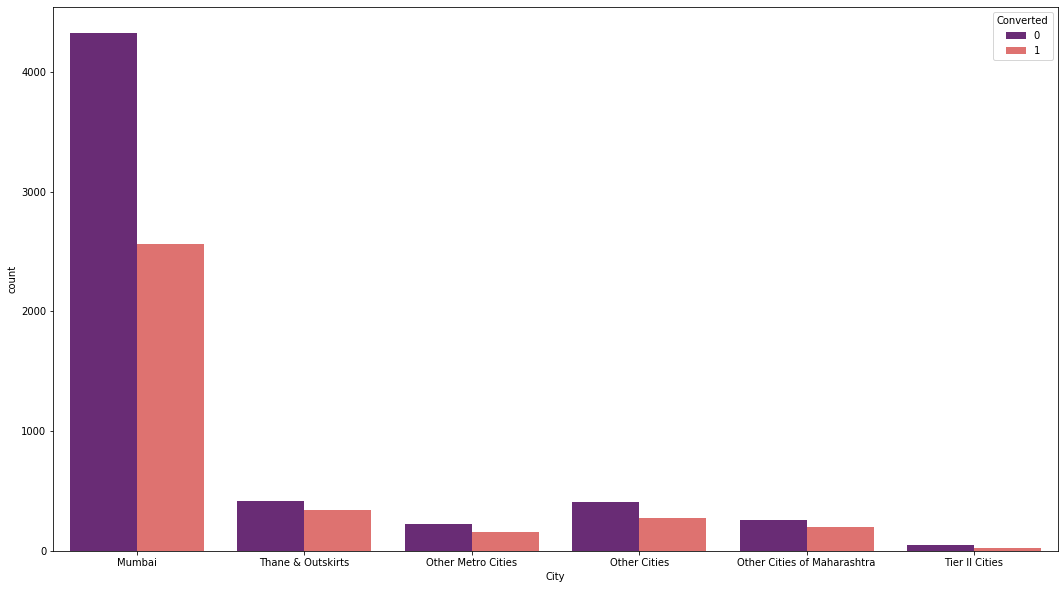

In [19]:
# lets check the spread of the city column after replacing nan values.
plt.figure(figsize=(18,10))
sns.countplot(lead_score['City'], hue= lead_score['Converted'],palette='magma')

plt.show()

#### insights: City is highly imbalanced with Mumbai representing most of the values

In [20]:
lead_score['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# since many in specialization is empty we asuume that those people have not opted the specilization and replacing the nan with not opted

lead_score['Specialization']=lead_score['Specialization'].replace(np.nan,'not opted')

In [22]:
lead_score['Specialization'].value_counts()

not opted                            3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

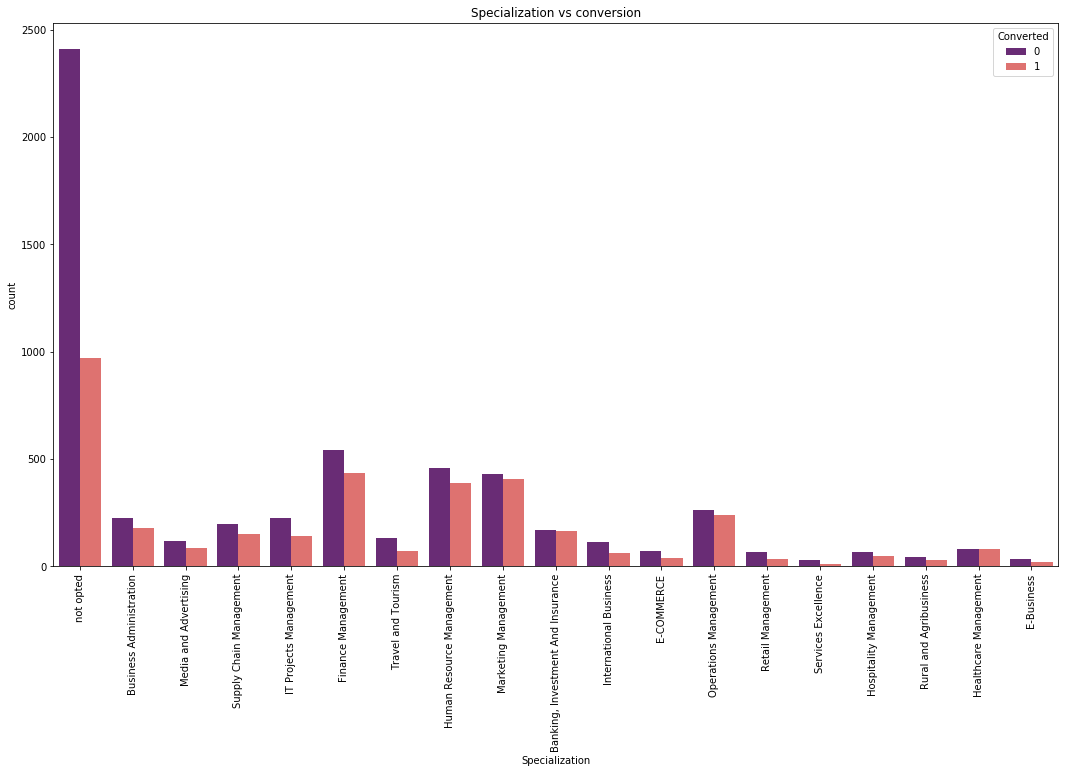

In [23]:
# lets check the spread of the specialization column after replacing nan.
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Specialization'], hue= lead_score['Converted'],palette='magma')
plt.title('Specialization vs conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

#### insights: since we have lot of nan's in the column specialization we belive its because they dont belong to any of this specialization hence we will impute it with not opted.

In [24]:
# combining all the management related variables into one management specialization
lead_score['Specialization']= lead_score['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management',"Healthcare Management",'Hospitality Management','Retail Management'],'Management_Specialization')

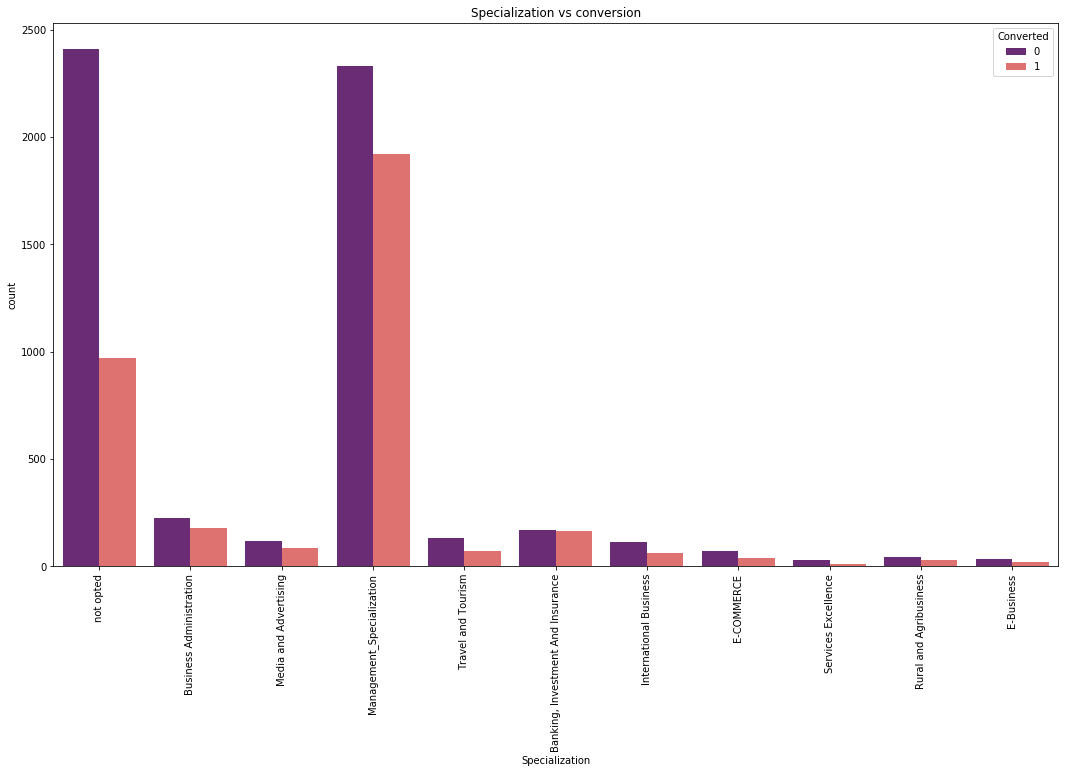

In [25]:
# lets check the spread of the specialization column after replacing all management realted specialization into one group.
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Specialization'], hue= lead_score['Converted'],palette='magma')
plt.title('Specialization vs conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

#### insights: since we have lot of columns with management it would make sense to club them together as one group as management specialization.

In [26]:
lead_score['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# since unemployed  has occured most number of times impute the missing values with the highest mode 

lead_score['What is your current occupation']=lead_score['What is your current occupation'].replace(np.nan,'Unemployed')

In [28]:
lead_score['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

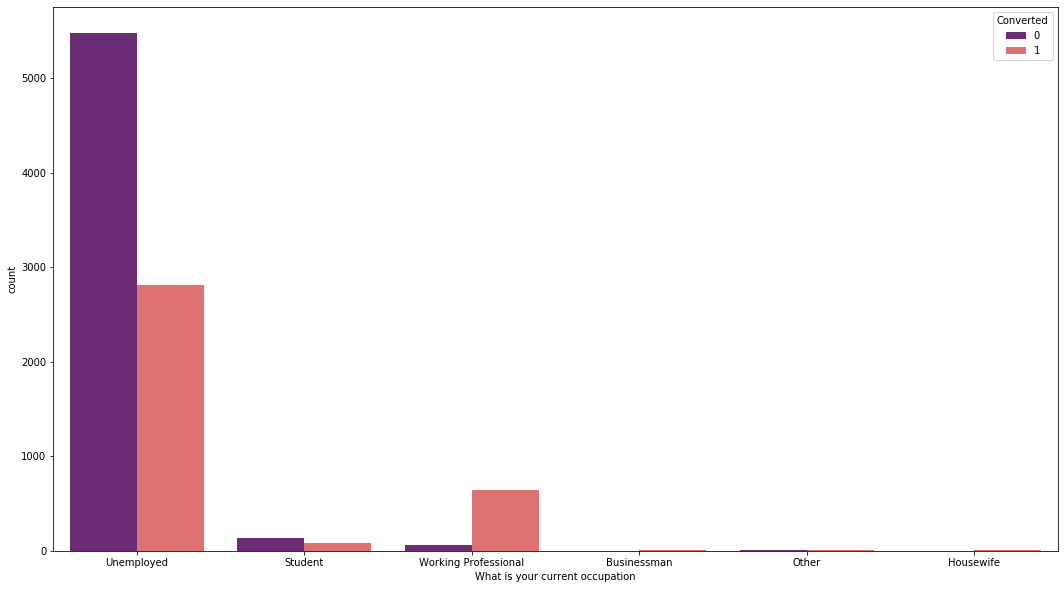

In [29]:
# lets check the spread of the what is your current occupation column after replacing nan.
plt.figure(figsize=(18,10))
sns.countplot(lead_score['What is your current occupation'], hue= lead_score['Converted'],palette='magma')

plt.show()

#### insights: 
    
1.customers who are Unemployeed are the ones who enquire more about X education online.

2.working professionals tend to get converted more.

In [30]:
lead_score['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# since better career prospects  has occured most number of times impute the missing values with the highest mode 

lead_score['What matters most to you in choosing a course']=lead_score['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [32]:
# value count for What matters most to you in choosing a course  after imputiung with the highest mode
lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
lead_score['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [34]:
# NAN's are replaced by not mentioned.

lead_score['Tags']=lead_score['Tags'].replace(np.nan,'not mentioned')

In [35]:
lead_score['Tags'].value_counts()

not mentioned                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

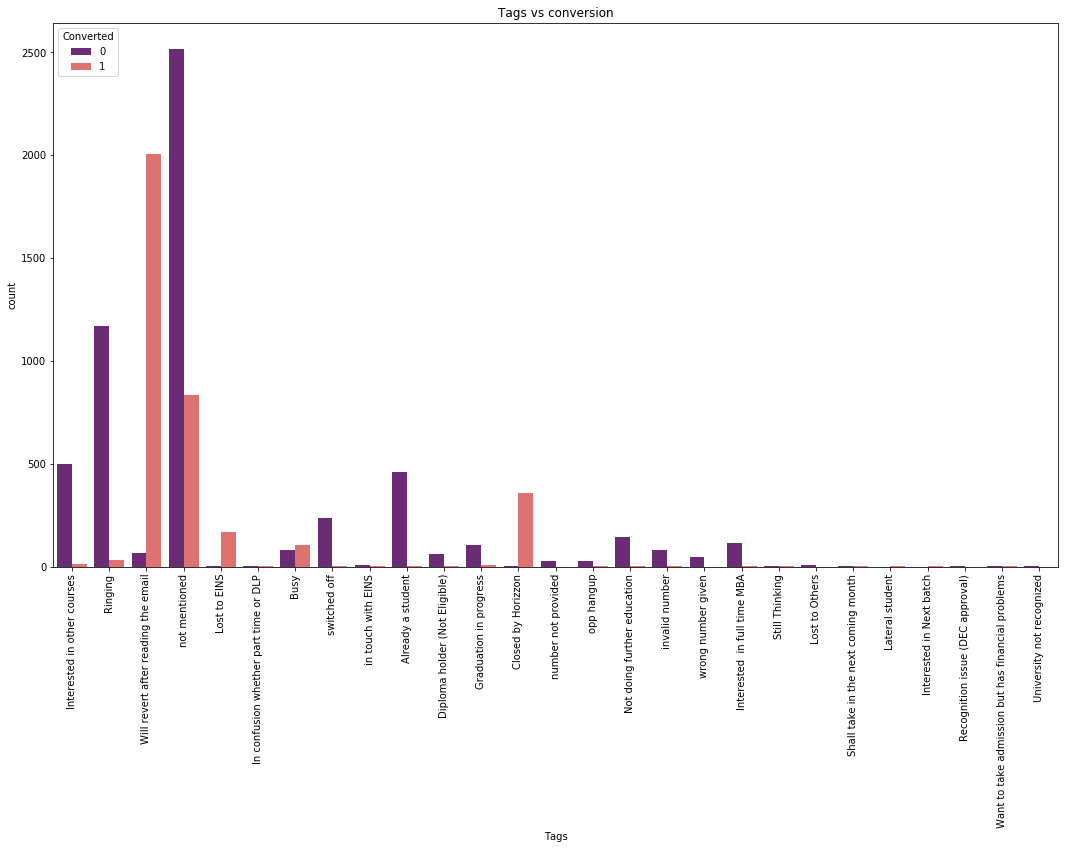

In [36]:
# lets check the spread of the Tag column
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Tags'], hue= lead_score['Converted'],palette='magma')
plt.title('Tags vs conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

#### insights: lot of nan's in Tags column is replaced by not mentioned.

In [37]:
# grouping low frequency value columns into a single group ie. other tags.
lead_score['Tags']= lead_score['Tags'].replace(['Lost to EINS','Not doing further education','Interested  in full time MBA',
'Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems',       
'Interested in Next batch','In confusion whether part time or DLP','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other_Tags')

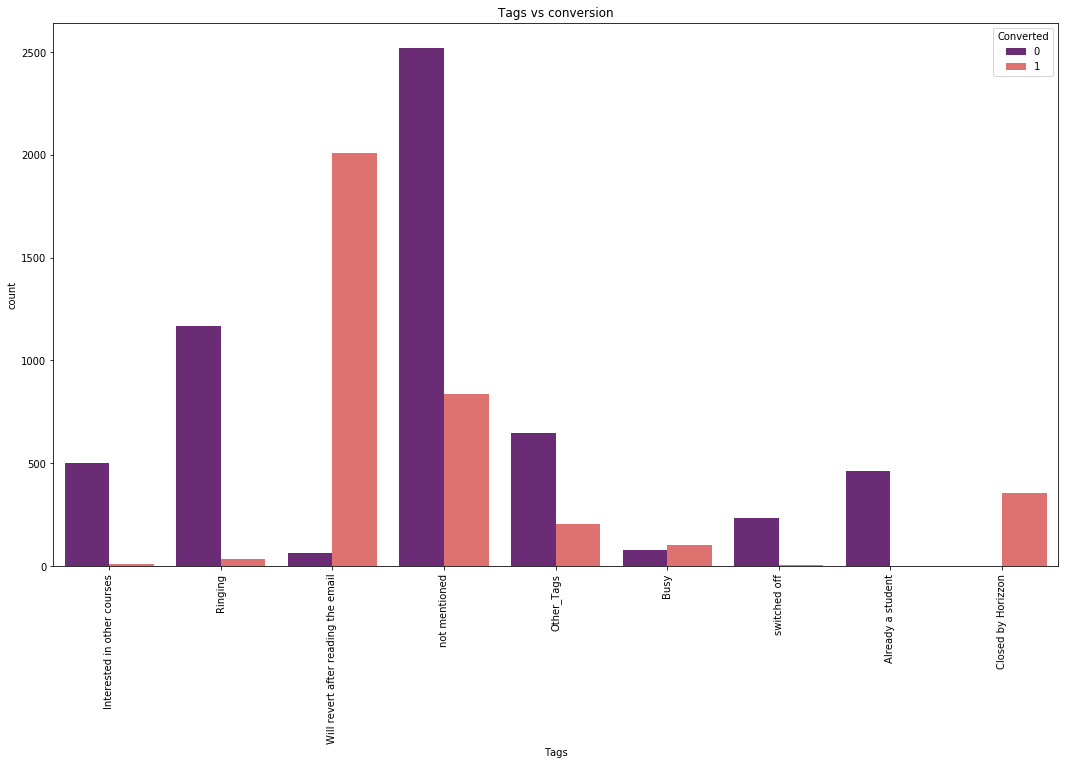

In [38]:
# lets check the spread of the Tag column after replacing low frequency values with other tags.
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Tags'], hue= lead_score['Converted'],palette='magma')
plt.title('Tags vs conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

### insights: so many customers tend to get back after going through the email.

In [39]:
# checking percentage of missing values
lead_score.isna().sum()/len(lead_score)*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [40]:
lead_score['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

In [41]:
# since the sources NAN information is unavailable we can replace it with unknown.

lead_score['Lead Source']=lead_score['Lead Source'].replace(np.nan,'unknown')

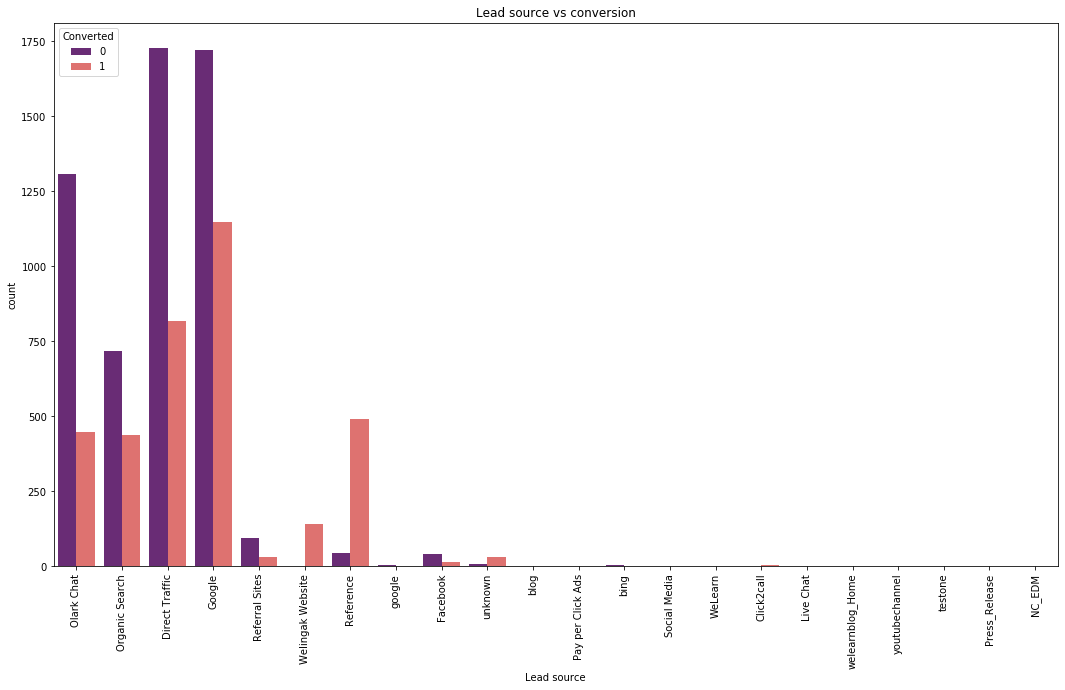

In [42]:
# lets check the spread of the lead source column
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Lead Source'], hue= lead_score['Converted'],palette='magma')
plt.title('Lead source vs conversion')
plt.xlabel('Lead source')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [43]:
# replace google with Google and Facebook as social media  and other low frequency value columns into another group called others.
lead_score['Lead Source']=lead_score['Lead Source'].replace(['google'],'Google')
lead_score['Lead Source']=lead_score['Lead Source'].replace(['Facebook'],'Social Media')
lead_score['Lead Source']=lead_score['Lead Source'].replace(['bing','Click2call','Press_Release',"Live Chat",'testone','NC_EDM','Pay per Click Ads',       
'youtubechannel','welearnblog_Home','WeLearn','blog'],'Others')

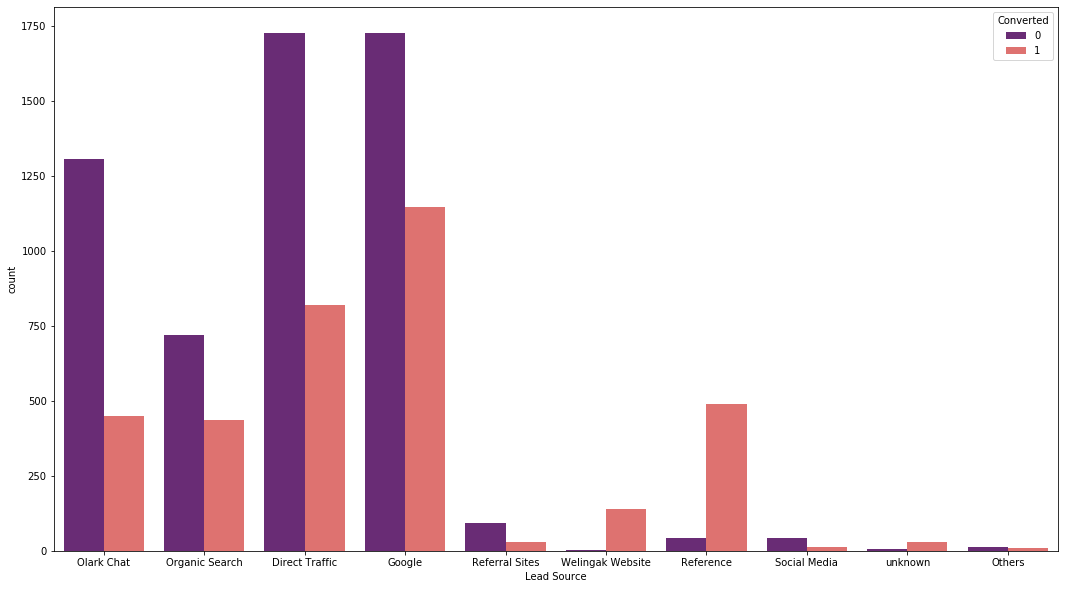

In [44]:
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Lead Source'], hue= lead_score['Converted'],palette='magma')
plt.show()

### insights:

 1. google and direct traffic seems to have high number of leads
 2. wellingak website and reference tends to have a high conversion rate.
 3. to improve the overall lead conversion rate the company should focus on olark chat, organic search, direct traffic and Google and more emphasis should be given to target leads from wellingak website and reference.
    

In [45]:
lead_score['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
# since the last activity of  NAN information is unavailable we can replace it with unknown. and low frequency value columns with others.

lead_score['Last Activity']=lead_score['Last Activity'].replace(np.nan,'unknown')
lead_score['Last Activity']=lead_score['Last Activity'].replace(['Unreachable', 'Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam',                  
'Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [47]:
lead_score['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
unknown                       103
Name: Last Activity, dtype: int64

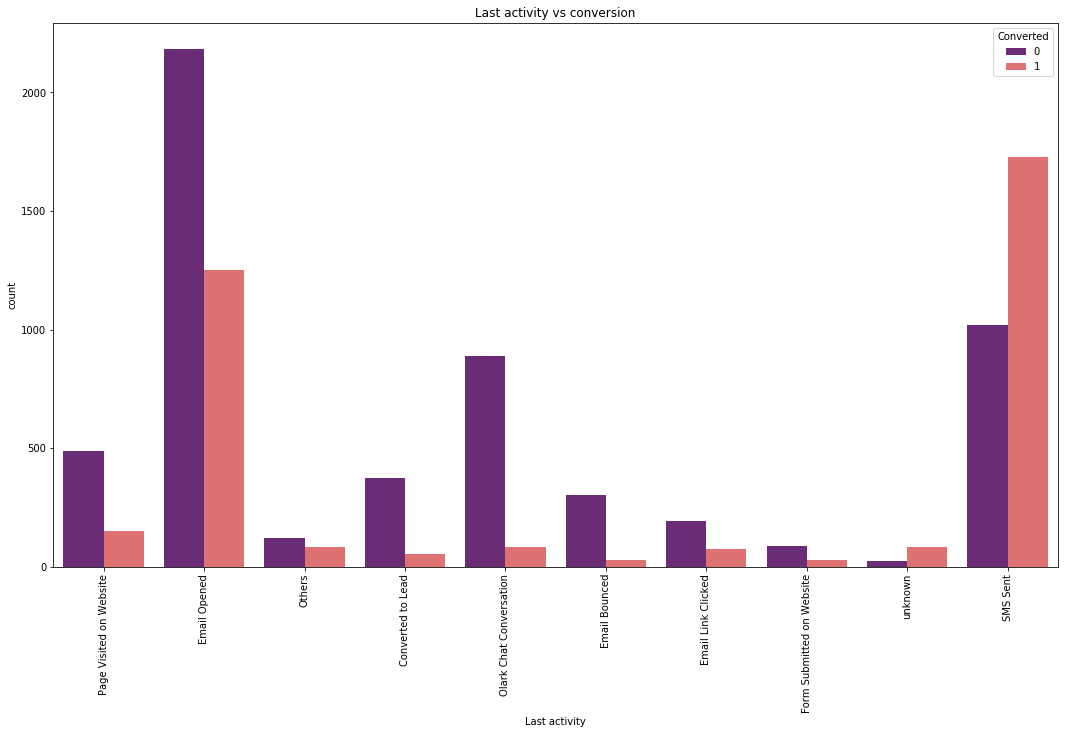

In [48]:
# lets check the spread of the last activity column
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Last Activity'], hue= lead_score['Converted'],palette='magma')
plt.title('Last activity vs conversion')
plt.xlabel('Last activity')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

### Insights:
    
1. leads with last activity as SMS sent tend to have high conversion rate.
2. more number of leads tend to have their emails opened as the last activity.


In [49]:
# checking percentage of missing values
lead_score.isna().sum()/len(lead_score)*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [50]:
# Dropping all rows with NAN as the percentage is less than 2% it wont affect the model much.

lead_score=lead_score.dropna()


In [51]:
# checking percentage of missing values
lead_score.isna().sum()/len(lead_score)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [52]:
# Remaining rows and columns after dropping 2% of nan values.
lead_score.shape

(9103, 30)

In [53]:
# check lead origin value counts
lead_score['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

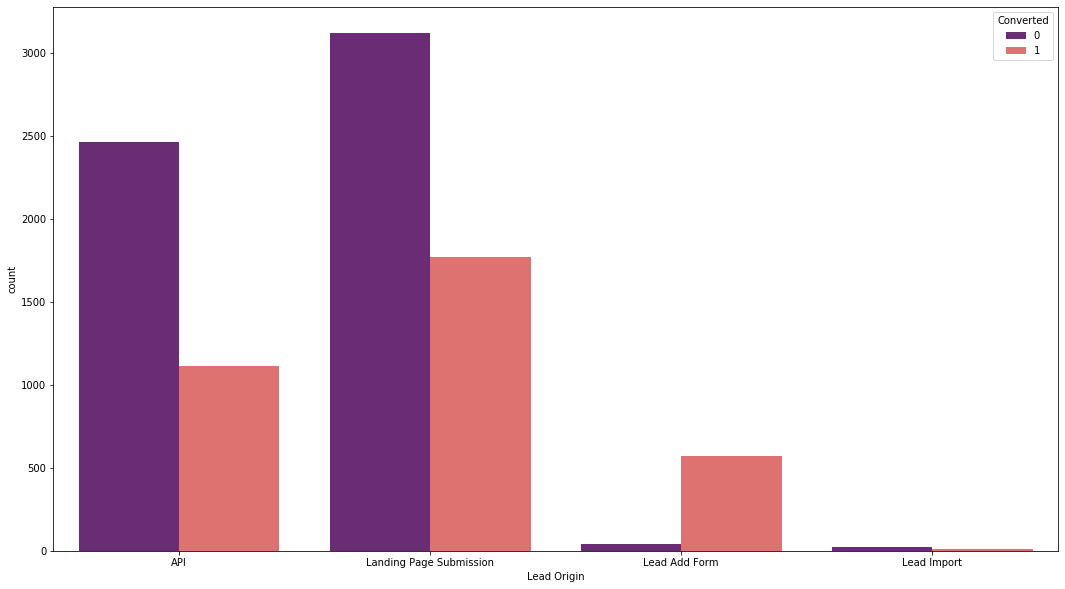

In [54]:
# lets check the spread of the  lead origin column
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Lead Origin'], hue= lead_score['Converted'], palette='magma')

plt.show()

### Insights:
    1. API and Landing page submission tend to have higher numbers and better lead conversion rate.
    2. Lead Add form has a higher lead conversion rate but lesser in numbers.
    3. lead import tend to have the lowest number and less lead conversion rate.
    4. inorder to increase the conversion rate company should focus more on getting leads from API and landing page submissions and emphasis to generate more lead conversions from lead add form.

In [55]:
# check the do not email value counts
lead_score['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

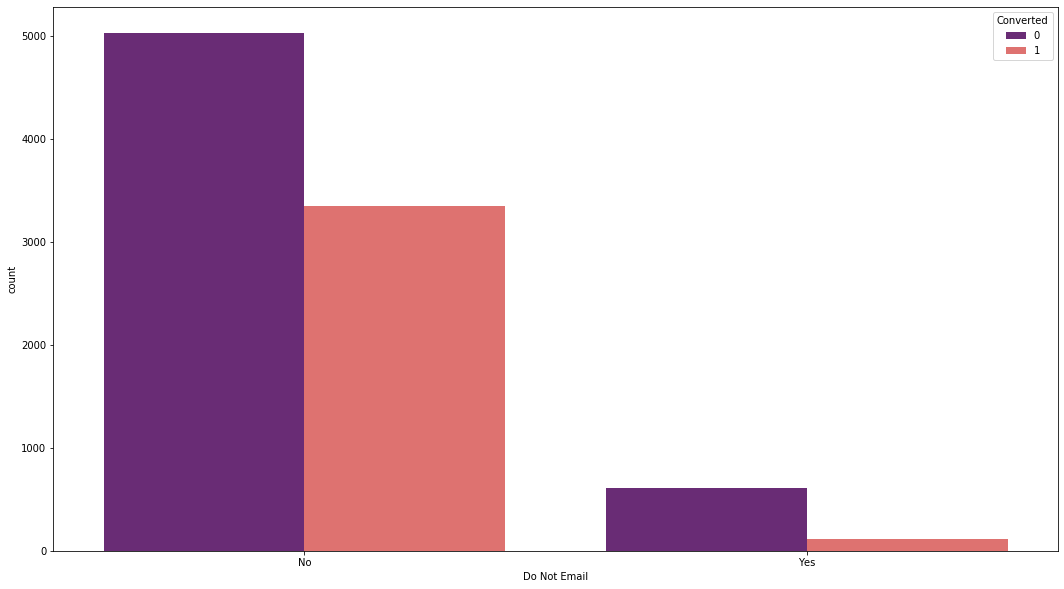

In [56]:
# lets check the spread of the do not email column
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Do Not Email'], hue= lead_score['Converted'], palette='magma')

plt.show()

In [57]:
# Highly skewed column needs to be dropped
lead_score['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [58]:
# Highly skewed column needs to be dropped
lead_score['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [59]:
# Highly skewed column needs to be dropped

lead_score['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [60]:
# Highly skewed column needs to be dropped

lead_score['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [61]:
# Highly skewed column needs to be dropped

lead_score['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [62]:
# Highly skewed column needs to be dropped

lead_score['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [63]:
# Highly skewed column needs to be dropped

lead_score['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [64]:
# Highly skewed column needs to be dropped

lead_score['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [65]:
# Highly skewed column needs to be dropped

lead_score['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [66]:
# Highly skewed column needs to be dropped

lead_score['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [67]:
# Highly skewed column needs to be dropped

lead_score['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [68]:
# Highly skewed column needs to be dropped

lead_score['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [69]:
# Highly skewed column needs to be dropped

lead_score['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [70]:

lead_score['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [71]:
lead_score['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

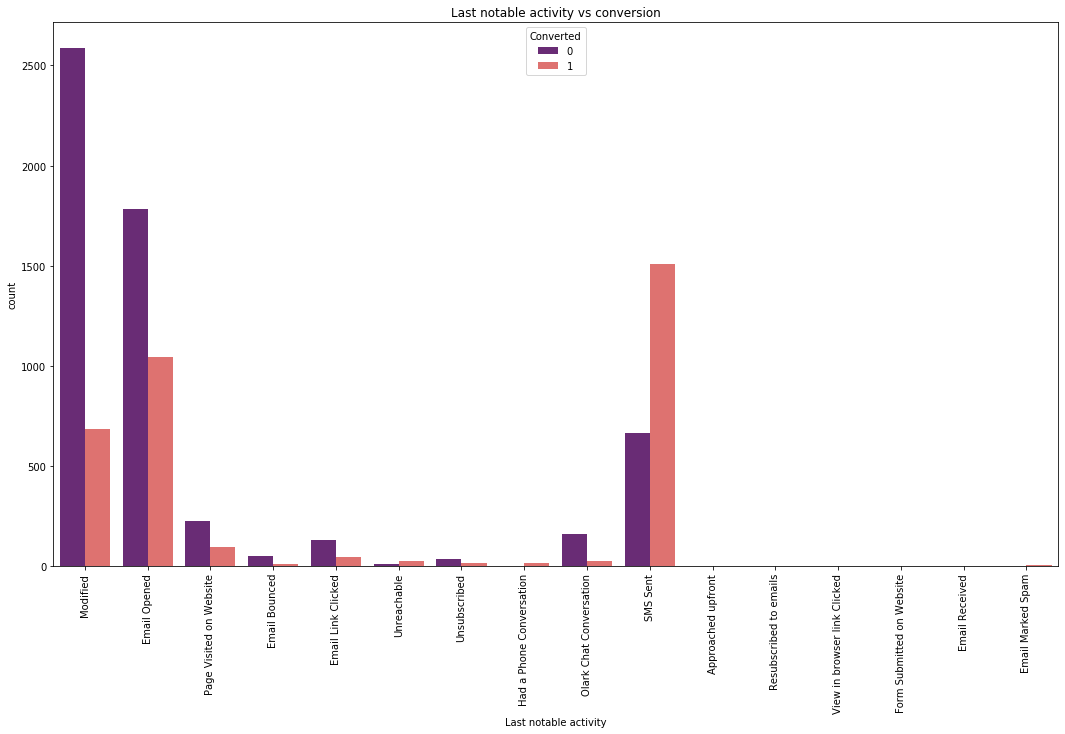

In [72]:
# lets check the spread of the last notable activity column
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Last Notable Activity'], hue= lead_score['Converted'], palette='magma')
plt.title('Last notable activity vs conversion')
plt.xlabel('Last notable activity')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [73]:
# low frequency values columns are clubbed together into other notable activity
lead_score['Last Notable Activity']=lead_score['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable', 'Had a Phone Conversation',          
'Email Marked Spam','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Approached upfront','Email Received'],'other_notable_activity')

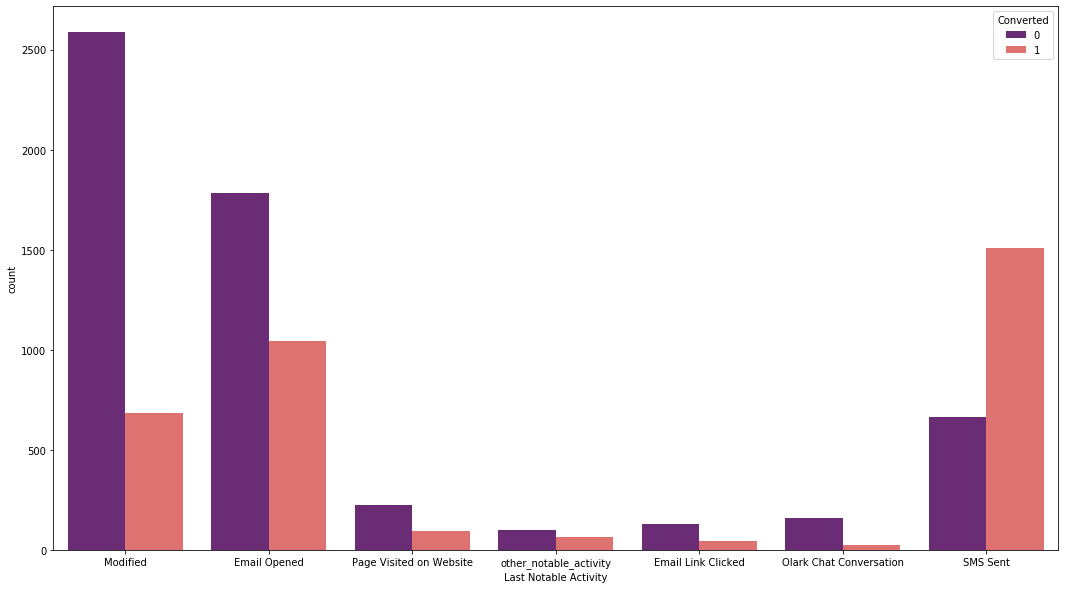

In [74]:
# lets check the spread of the last notable activity column
plt.figure(figsize=(18,10))
sns.countplot(lead_score['Last Notable Activity'], hue= lead_score['Converted'], palette='magma')

plt.show()

In [75]:
lead_score.shape

(9103, 30)

###  Why each columns are dropped:

'Lead Number': will not add any value to the model creation
'Do Not Call':Highly skewed column 
'Country':Highly skewed column 
'What matters most to you in choosing a course':Highly skewed column 
'Search' : Highly skewed column                                          
'Magazine': Highly skewed column                                        
'Newspaper Article': Highly skewed column                               
'X Education Forums'  :Highly skewed column                             
'Newspaper' :Highly skewed column                                        
'Digital Advertisement':Highly skewed column                             
'Through Recommendations': Highly skewed column                          
'Receive More Updates About Our Courses': Highly skewed column                                                   
'Update me on Supply Chain Content':Highly skewed column               
'Get updates on DM Content' :Highly skewed column                                                                    
'I agree to pay the amount through cheque':Highly skewed column 


In [76]:
# Dropping all the columns that dont add value to the model.
lead_score=lead_score.drop([
'Lead Number',
'Do Not Call',
'Country',
'What matters most to you in choosing a course','Search',                                           
'Magazine',                                         
'Newspaper Article',                                
'X Education Forums',                               
'Newspaper',                                        
'Digital Advertisement',                            
'Through Recommendations',                          
'Receive More Updates About Our Courses',                                                    
'Update me on Supply Chain Content',                
'Get updates on DM Content',                                                                     
'I agree to pay the amount through cheque'], axis=1)

In [77]:
# Shape of the data frame after dropping the columns.
lead_score.shape

(9103, 15)

### Numeric Analysis

In [78]:
# checking how many values are converted in the dataframe
converted= (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
converted

38.02043282434362

In [79]:
# checking the data types of the dataframe
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

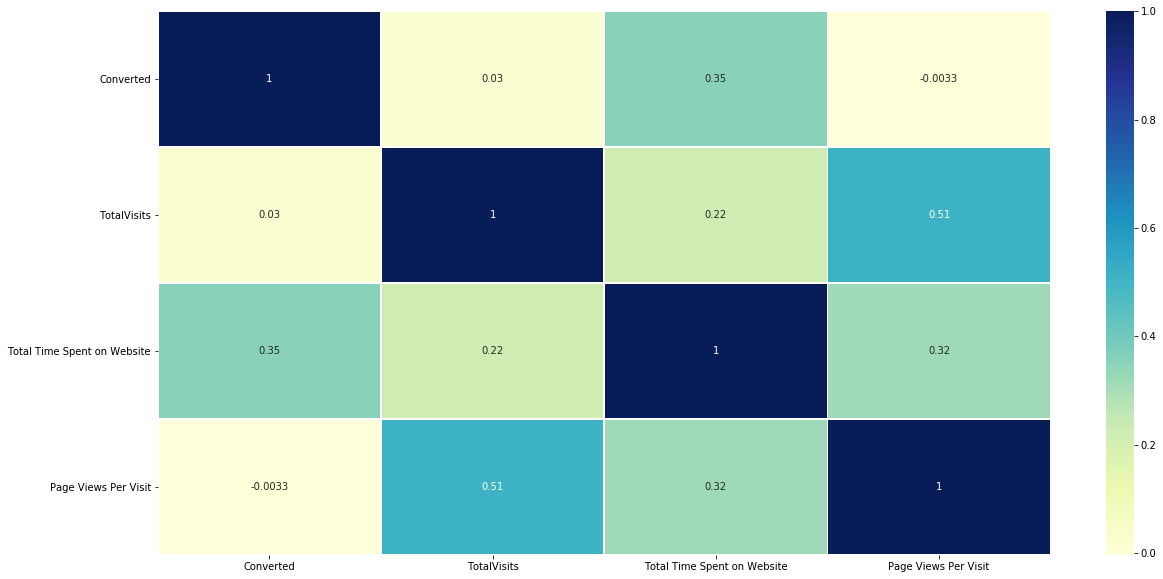

In [80]:
# checking for correlation of numeric variables

# checking for correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(lead_score[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(), annot= True, cmap='YlGnBu',linewidths=.5)
plt.show()

### insights:
1.Total visits and page views per visit are highly correlated.

2.Time spent on website has a 35% rate of customers getting converted into lead.


### Handling of outliers

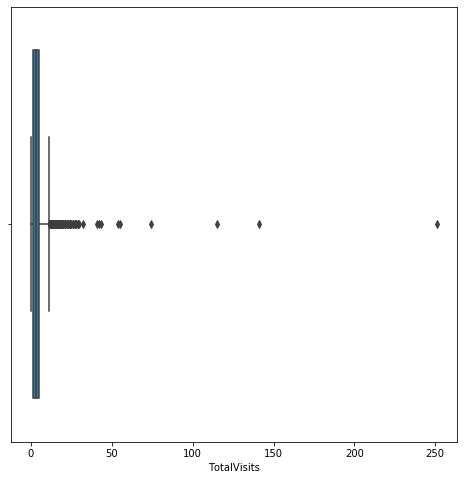

In [81]:
# Handling outliers of numeric columns

plt.figure(figsize=(8,8))
sns.boxplot(lead_score['TotalVisits'])
plt.show()

### insights:
1.outliers are visible

2.soft capping the outliers to 95% of the values.

In [82]:
# checking the percentile value
lead_score['TotalVisits'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

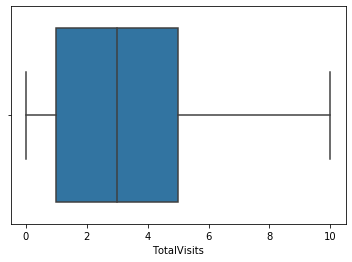

In [83]:
# performing soft capping by considering only 95% value.
percentile=lead_score['TotalVisits'].quantile([0.95]).values
lead_score['TotalVisits'][lead_score['TotalVisits']>= percentile[0]]=percentile[0]
sns.boxplot(lead_score['TotalVisits'])

Outliers are removed

In [84]:
# another numeric column outlier check
lead_score['TotalVisits'].describe()

count    9103.000000
mean        3.181918
std         2.781834
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: TotalVisits, dtype: float64

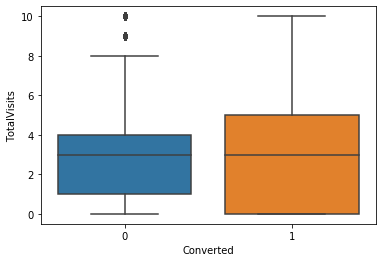

In [85]:
sns.boxplot ( y='TotalVisits', x='Converted', data=lead_score)

### insights:
    1. Both the medians are on the same level and nothing much can be infered from above.

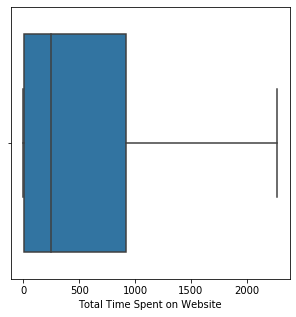

In [86]:
plt.figure(figsize=(5,5))
sns.boxplot(lead_score['Total Time Spent on Website'])
plt.show()

no outliers are noticed

In [87]:
# another outlier check for numeric column
lead_score['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

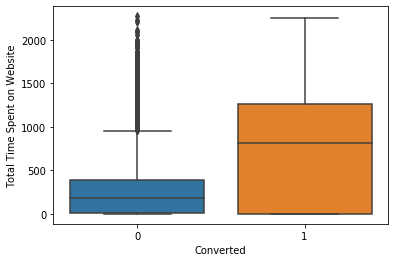

In [88]:
sns.boxplot ( y='Total Time Spent on Website', x='Converted', data=lead_score)

### insights:
    1. customers spending more time on the website tend to convert more.
    2. Hence the customer experince on the website should be made more seamless and attractive.

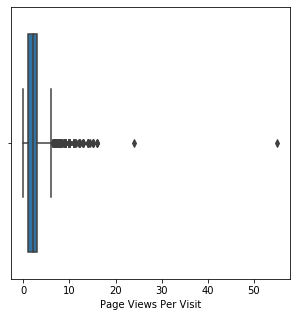

In [89]:
plt.figure(figsize=(5,5))
sns.boxplot(lead_score['Page Views Per Visit'])
plt.show()

outliers are visible

In [90]:
# check statistical value
lead_score['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [91]:
# checking percentile value
lead_score['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

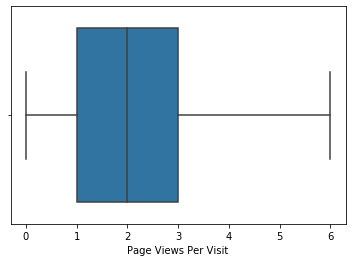

In [92]:
# soft capping of values to 95% 
percentile=lead_score['Page Views Per Visit'].quantile([0.95]).values
lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit']>= percentile[0]]=percentile[0]
sns.boxplot(lead_score['Page Views Per Visit'])

outliers are removed

In [93]:
lead_score['Page Views Per Visit'].describe()

count    9103.000000
mean        2.258944
std         1.792536
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

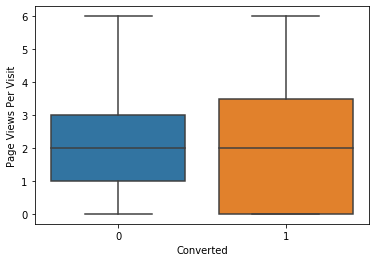

In [94]:
sns.boxplot ( y='Page Views Per Visit', x='Converted', data=lead_score)

### insights:
1. Both the medians are on the same level and nothing much can be infered from above

In [95]:
# check the head of the dataframe
lead_score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not opted,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,not opted,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,not opted,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [96]:
lead_score.shape

(9103, 15)

### Data Preparation

### Binary mapping of categorical columns

In [97]:
# converting some columns from yes/no to 1/0, Do not email, a free copy of mastering the interview.

#list of variables to map
var_list=['Do Not Email','A free copy of Mastering The Interview']

# defining the map function

def binary_map(x):
    return x.map({'Yes': 1,'No': 0})

# applying function to lead_score 
lead_score[var_list]= lead_score[var_list].apply(binary_map)


In [98]:
lead_score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not opted,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,not opted,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,not opted,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### for categorical variables with multiple levels, create dummy features( one- hot encoding)

In [99]:

dummy_categorical= pd.get_dummies( lead_score[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City', 'Last Notable Activity']], drop_first=True)

# adding result to the dummy variable

lead_score= pd.concat([lead_score,dummy_categorical], axis=1)


In [100]:
# checking the head of the dat
lead_score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_unknown,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not opted,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not opted,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,not opted,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,not opted,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [101]:
# checking the shape
lead_score.shape

(9103, 69)

In [102]:
# Dropping all the repetative columns
lead_score=lead_score.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City', 'Last Notable Activity'], axis=1)

In [103]:
lead_score.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_unknown,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not opted,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [104]:
lead_score.shape

(9103, 61)

In [105]:
# Dropping prospect ID column as it wont add further value.
lead_score=lead_score.drop(['Prospect ID'], axis=1)

In [106]:
lead_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_unknown,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not opted,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [107]:
lead_score.shape

(9103, 60)

In [108]:
### Looking at correlations value

lead_score.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_unknown,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not opted,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
Do Not Email,1.000000,-0.136553,-0.000833,-0.047943,0.019757,0.056098,0.096400,-0.021721,-0.017183,-0.072073,-0.051918,0.034433,0.011254,-0.036293,-0.010263,-0.017731,0.002542,0.041020,0.616344,-0.043879,-0.221404,-0.018917,-0.055620,0.154025,0.082735,-0.017498,0.004494,0.012695,0.030230,0.002954,0.003777,-0.000182,0.028196,0.054132,0.060457,-0.038655,-0.009247,-0.001932,0.006908,0.040466,-0.047911,-0.016441,-0.047546,-0.027360,0.079307,-0.019960,-0.097307,0.059764,0.027652,0.012226,-0.004795,0.038748,-0.006413,0.045733,-0.190266,0.120103,-0.013176,0.050213,-0.026432,0.300550
Converted,-0.136553,1.000000,0.046728,0.354939,-0.003800,-0.033079,-0.040698,0.306224,-0.010824,0.026621,-0.125395,-0.001874,0.000074,0.254067,-0.032135,-0.009589,0.149250,0.060132,-0.127649,-0.038243,-0.025097,-0.032491,-0.209246,0.004117,-0.081726,0.338020,0.025754,-0.001927,-0.006604,-0.008079,0.129196,0.011059,0.008234,-0.014398,-0.008912,-0.158220,0.040166,0.018395,-0.005620,-0.280294,0.315113,0.055591,0.233576,-0.177806,-0.094039,-0.280750,0.653046,-0.207261,-0.123234,0.011587,0.028327,0.012111,0.040730,-0.007901,-0.015081,-0.264267,-0.071874,-0.034393,0.362200,0.003732
TotalVisits,-0.000833,0.046728,1.000000,0.363183,0.767588,0.297891,0.456351,-0.283085,-0.061444,0.219175,-0.501650,0.303512,0.000971,-0.239261,0.090695,-0.057827,-0.128793,-0.063265,-0.066153,-0.031029,0.065150,0.021442,-0.219540,0.041639,0.225304,0.020057,0.072420,0.031356,0.040952,0.063092,0.237345,0.072455,0.042383,0.027897,0.100069,-0.404490,-0.008340,0.034343,-0.031964,0.011410,-0.000980,0.049635,0.013305,-0.005947,0.025313,0.088094,0.054390,-0.123647,0.035085,0.089421,0.065553,0.074409,0.098667,0.023546,0.083104,-0.154410,-0.061140,0.197264,0.017963,0.015896
Total Time Spent on Website,-0.047943,0.354939,0.363183,1.000000,0.366835,0.179005,0.294515,-0.194106,-0.051363,0.216937,-0.376633,0.101911,-0.003329,-0.162064,0.012850,-0.048006,-0.091594,-0.049895,-0.036669,-0.039876,0.009727,0.009570,-0.190181,0.011993,0.031634,0.127009,0.055889,0.020160,-0.000699,0.023475,0.208467,0.043585,0.021989,0.003712,0.043746,-0.297863,0.006983,0.031519,-0.012600,-0.084316,0.096616,0.060652,0.036720,-0.053879,-0.006949,-0.052703,0.263795,-0.151480,-0.026352,0.056340,0.069380,0.050

### Test -Train -Split: Logistic model Building

In [109]:
# import Train_Test split
from sklearn.model_selection import train_test_split

In [110]:
# Target variable in y and independent variable in X
y= lead_score['Converted']
X= lead_score.drop(['Converted'], axis=1)

In [111]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_unknown,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not opted,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [113]:
# splitting into test and tyrain data set
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.7, test_size=0.3,random_state=100)

### Feature Scaling:

In [114]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_unknown,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not opted,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
7962,0,-0.068258,1.476324,-0.423364,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5520,0,1.362470,-0.771066,2.083179,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1962,0,0.647106,-0.571257,0.133646,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1566,0,2.435517,1.393834,0.690655,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9170,0,-1.141305,-0.881052,-1.258878,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [115]:
# checking the conversion rate of the leads
converted= (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
converted

38.02043282434362

### Model Building

#### Runing first train model

In [116]:
import statsmodels.api as sm

In [117]:
#Logistic regression model
logm1= sm.GLM(y_train,(sm.add_constant(X_train)),family= sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1412.2
Date:                Mon, 08 Feb 2021   Deviance:                       2824.5
Time:                        22:13:58   Pearson chi2:                 8.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.9605      1.856     -3.212      0.001      -9.598      -2.323
Do Not Email                                            -1.2682      0.273     -4.642      0.000      -1.804      -0.733
TotalVisits                                              0.4217      0.079      5.325      0.000       0.266       0.577
Total Time Spent on Website                              1.1057      0.058     19.092      0.000       0.992       1.219
Page Views Per Visit                                    -0.4937      0.092     -5.370      0.000      -0.674      -0.313
A free copy of Mastering The Interview                   0.1339      0.159      0.844      0.398      -0.177       0.445
Lead Origin_Landing Page Submission                     -0.2473      0.206     -1.200      0.230      -0.651       0.157
Lead Origin_Lead Add Form                                1.4850      1.311      1.133      0.257      -1.084       4.054
Lead Origin_Lead Import                                  0.2299      1.692      0.136      0.892      -3.087       3.547
Lead Source_Google                                       0.0939      0.166      0.566      0.572      -0.232       0.419
Lead Source_Olark Chat                                   1.0031      0.228      4.400      0.000       0.556       1.450
Lead Source_Organic Search                              -0.0043      0.190     -0.023      0.982      -0.378       0.369
Lead Source_Others                                      -0.0577      1.073     -0.054      0.957      -2.161       2.046
Lead Source_Reference                                    0.2595      1.371      0.189      0.850      -2.427       2.946
Lead Source_Referral Sites                              -0.2328      0.522     -0.446      0.656      -1.256       0.790
Lead Source_Social Media                                 0.5267      1.624      0.324      0.746      -2.657       3.710
Lead Source_Welingak Website                             3.9554      1.502      2.633      0.008       1.012       6.899
Lead Source_unknown                                      2.1696      1.644      1.320      0.187      -1.052       5.391
Last Activity_Email Bounced                              0.0341      0.570      0.060      0.952      -1.083       1.151
Last Activity_Email Link Clicked                         0.9859      0.558      1.766      0.077      -0.108       2.080
Last Activity_Email Opened                               1.1002      0.330      3.337      0.001       0.454       1.747
Last Activity_Form Submitted on Website                  0.7130      0.502      1.422      0.155      -0.270       1.696
Last Activity_Olark Chat Conversation                   -0

### Feature selection using RFE


In [118]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [119]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [120]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False])

In [121]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Others', False, 26),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_unknown', True, 1),
 ('Last Activity_Email Bounced', False, 38),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 14),
 ('Last Activity_Page Visite

In [122]:
col= X_train.columns[rfe.support_]

In [123]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_International Business', 'Specialization_Management_Specialization', 'Specialization_Media and Advertising', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Travel and Tourism', 'Specialization_not opted', 'What is your current occupation_Housewife', 'What is your current occupation_Other',
   

### Assesing the model with statsmodel

In [124]:
X_train_sm= sm.add_constant(X_train[col])
logm2= sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1483.5
Date:                Mon, 08 Feb 2021   Deviance:                       2967.1
Time:                        22:14:05   Pearson chi2:                 8.07e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3867      0.311    -14.125      0.000      -4.995      -3.778
Do Not Email                                -1.4174      0.212     -6.680      0.000      -1.833      -1.002
Total Time Spent on Website                  1.0747      0.055     19.679      0.000       0.968       1.182
Lead Origin_Lead Add Form                    2.3905      0.381      6.271      0.000       1.643       3.138
Lead Source_Olark Chat                       1.3839      0.139      9.964      0.000       1.112       1.656
Lead Source_Welingak Website                 3.5831      0.822      4.360      0.000       1.973       5.194
Lead Source_unknown                          2.3103      1.270      1.819      0.069      -0.180       4.800
Last Activity_Olark Chat Conversation       -1.5060      0.205     -7.349      0.000      -1.908      -1.104
Tags_Busy                                    3.1518      0.382      8.245      0.000       2.403       3.901
Tags_Closed by Horizzon                      8.4291      0.785     10.735      0.000       6.890       9.968
Tags_Other_Tags                              2.7658      0.324      8.526      0.000       2.130       3.402
Tags_Ringing                                -0.8300      0.390     -2.130      0.033      -1.594      -0.066
Tags_Will revert after reading the email     6.9042      0.350     19.703      0.000       6.217       7.591
Tags_not mentioned                           2.5339      0.312      8.122      0.000       1.922       3.145
Tags_switched off                           -0.8960      0.678     -1.321      0.186      -2.225       0.433
Last Notable Activity_SMS Sent               2.0466      0.120     17.071      0.000       1.812       2.282
============================================================================================================
"""

In [125]:
# Dropping columns where p values>0.05

# Drop Tags_switched_off

col_1= col.drop(['Tags_switched off'],1)



In [126]:
col_1

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Lead Source_unknown', 'Last Activity_Olark Chat Conversation', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_not mentioned', 'Last Notable Activity_SMS Sent'], dtype='object')

#### Running the model again : 2nd iteration

In [127]:
X_train_sm= sm.add_constant(X_train[col_1])
logm2= sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1484.5
Date:                Mon, 08 Feb 2021   Deviance:                       2969.1
Time:                        22:14:06   Pearson chi2:                 7.95e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.6284      0.280    -16.524      0.000      -5.177      -4.079
Do Not Email                                -1.4175      0.212     -6.690      0.000      -1.833      -1.002
Total Time Spent on Website                  1.0765      0.055     19.716      0.000       0.969       1.184
Lead Origin_Lead Add Form                    2.3996      0.382      6.282      0.000       1.651       3.148
Lead Source_Olark Chat                       1.3910      0.139     10.017      0.000       1.119       1.663
Lead Source_Welingak Website                 3.5772      0.822      4.352      0.000       1.966       5.188
Lead Source_unknown                          2.3104      1.270      1.818      0.069      -0.180       4.800
Last Activity_Olark Chat Conversation       -1.5071      0.205     -7.348      0.000      -1.909      -1.105
Tags_Busy                                    3.4027      0.354      9.617      0.000       2.709       4.096
Tags_Closed by Horizzon                      8.6692      0.774     11.200      0.000       7.152      10.186
Tags_Other_Tags                              3.0083      0.295     10.204      0.000       2.431       3.586
Tags_Ringing                                -0.5758      0.360     -1.598      0.110      -1.282       0.131
Tags_Will revert after reading the email     7.1473      0.323     22.123      0.000       6.514       7.780
Tags_not mentioned                           2.7781      0.280      9.917      0.000       2.229       3.327
Last Notable Activity_SMS Sent               2.0265      0.119     17.098      0.000       1.794       2.259
============================================================================================================
"""

In [128]:
# Dropping columns where p values>0.05

# Drop Tags_Ringing

col_2= col_1.drop(['Tags_Ringing'],1)

In [129]:
col_2


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Lead Source_unknown', 'Last Activity_Olark Chat Conversation', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Other_Tags', 'Tags_Will revert after reading the email', 'Tags_not mentioned', 'Last Notable Activity_SMS Sent'], dtype='object')

#### Running the model again : 3rd iteration

In [130]:
X_train_sm= sm.add_constant(X_train[col_2])
logm2= sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1485.8
Date:                Mon, 08 Feb 2021   Deviance:                       2971.5
Time:                        22:14:06   Pearson chi2:                 7.81e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9786      0.200    -24.907      0.000      -5.370      -4.587
Do Not Email                                -1.4107      0.212     -6.666      0.000      -1.825      -0.996
Total Time Spent on Website                  1.0752      0.055     19.696      0.000       0.968       1.182
Lead Origin_Lead Add Form                    2.3630      0.376      6.284      0.000       1.626       3.100
Lead Source_Olark Chat                       1.3911      0.139     10.022      0.000       1.119       1.663
Lead Source_Welingak Website                 3.6096      0.819      4.407      0.000       2.004       5.215
Lead Source_unknown                          2.3324      1.264      1.846      0.065      -0.145       4.809
Last Activity_Olark Chat Conversation       -1.5068      0.205     -7.340      0.000      -1.909      -1.104
Tags_Busy                                    3.7663      0.287     13.138      0.000       3.204       4.328
Tags_Closed by Horizzon                      9.0244      0.748     12.071      0.000       7.559      10.490
Tags_Other_Tags                              3.3627      0.217     15.507      0.000       2.938       3.788
Tags_Will revert after reading the email     7.5018      0.254     29.549      0.000       7.004       7.999
Tags_not mentioned                           3.1348      0.195     16.113      0.000       2.753       3.516
Last Notable Activity_SMS Sent               2.0004      0.117     17.082      0.000       1.771       2.230
============================================================================================================
"""

In [131]:
# Dropping columns where p values>0.05

# Drop Lead Source_unknown

col_3= col_2.drop(['Lead Source_unknown'],1)

In [132]:
col_3

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Other_Tags', 'Tags_Will revert after reading the email', 'Tags_not mentioned', 'Last Notable Activity_SMS Sent'], dtype='object')

#### Running the model again : 4th iteration

In [133]:
X_train_sm= sm.add_constant(X_train[col_3])
logm2= sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1488.0
Date:                Mon, 08 Feb 2021   Deviance:                       2976.0
Time:                        22:14:07   Pearson chi2:                 8.00e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9920      0.200    -24.936      0.000      -5.384      -4.600
Do Not Email                                -1.3879      0.209     -6.639      0.000      -1.798      -0.978
Total Time Spent on Website                  1.0734      0.055     19.669      0.000       0.966       1.180
Lead Origin_Lead Add Form                    2.6055      0.357      7.301      0.000       1.906       3.305
Lead Source_Olark Chat                       1.3852      0.139      9.986      0.000       1.113       1.657
Lead Source_Welingak Website                 3.3547      0.809      4.147      0.000       1.769       4.940
Last Activity_Olark Chat Conversation       -1.5047      0.205     -7.337      0.000      -1.907      -1.103
Tags_Busy                                    3.7787      0.287     13.174      0.000       3.217       4.341
Tags_Closed by Horizzon                      8.9982      0.747     12.039      0.000       7.533      10.463
Tags_Other_Tags                              3.3770      0.217     15.564      0.000       2.952       3.802
Tags_Will revert after reading the email     7.5060      0.254     29.539      0.000       7.008       8.004
Tags_not mentioned                           3.1523      0.195     16.187      0.000       2.771       3.534
Last Notable Activity_SMS Sent               2.0024      0.117     17.115      0.000       1.773       2.232
============================================================================================================
"""

In [134]:
# Getting the pridicted value on the train set

y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

7962    0.877836
5520    0.114970
1962    0.003665
1566    0.982191
9170    0.010430
5097    0.197779
8954    0.040163
309     0.889509
5519    0.646162
1050    0.976131
dtype: float64

In [135]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87783597, 0.11497016, 0.0036652 , 0.98219096, 0.01043012,
       0.19777895, 0.04016323, 0.8895092 , 0.64616192, 0.97613062])

In [136]:
### Creating a new dataframe to check actual converted and probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.877836,7962
1,0,0.114970,5520
2,0,0.003665,1962
3,1,0.982191,1566
4,0,0.010430,9170


#### creating a new dataframe 'predicted' with 1 if Converted_prob>0.5 else 0

In [137]:
y_train_pred_final['predicted']= y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.877836,7962,1
1,0,0.114970,5520,0
2,0,0.003665,1962,0
3,1,0.982191,1566,1
4,0,0.010430,9170,0


### Checking Confusion matrix

In [138]:
from sklearn import metrics


In [139]:
# confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3758,  195],
       [ 396, 2023]], dtype=int64)

In [140]:
### checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9072504708097928


### Checking VIF's

In [141]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_3].values, i) for i in range(X_train[col_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.82
3,Lead Source_Olark Chat,1.80
9,Tags_Will revert after reading the email,1.59
10,Tags_not mentioned,1.45
11,Last Notable Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.43
5,Last Activity_Olark Chat Conversation,1.39
4,Lead Source_Welingak Website,1.37
7,Tags_Closed by Horizzon,1.18
0,Do Not Email,1.09


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with metrics beyond simple accuracy

### Metrics beyond simple accuracy

In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8362959900785448

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.9506703769289148

In [146]:
# Calculate false postive rate - predicting converted when customer has actually not converted.
print(FP/ float(TN+FP))

0.04932962307108525


In [147]:
# positive predictive value 
print (TP / float(TP+FP))

0.912082957619477


In [148]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9046701974000962


### Plotting the ROC curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

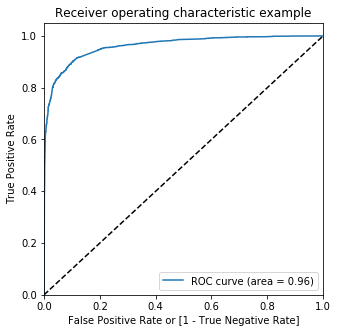

In [151]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Insights: Train set data: 0.5 arbitaray cut-off 
    1. Accuracy :  90%
    2. Sensitivity: 83%
    3. Specificity: 95%
    4. AOC: 96% 
The above values indicate the model is performing well.
    

### Finding the optimal cut-off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.877836,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.114970,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.003665,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.982191,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010430,9170,0,1,0,0,0,0,0,0,0,0,0


In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.801475  0.966102  0.700734
0.2   0.2  0.887163  0.919802  0.867189
0.3   0.3  0.899090  0.897892  0.899823
0.4   0.4  0.903013  0.865647  0.925879
0.5   0.5  0.907250  0.836296  0.950670
0.6   0.6  0.907407  0.809839  0.967114
0.7   0.7  0.894068  0.759818  0.976221
0.8   0.8  0.887790  0.732947  0.982545
0.9   0.9  0.865505  0.660190  0.991146


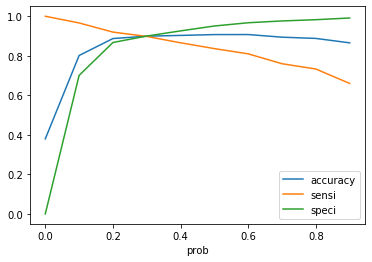

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [155]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.877836,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.114970,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.003665,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.982191,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010430,9170,0,1,0,0,0,0,0,0,0,0,0,0


### Assign Lead_Score

In [156]:
y_train_pred_final['Lead_Score']= y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.877836,7962,1,1,1,1,1,1,1,1,1,1,0,1,88
1,0,0.114970,5520,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.003665,1962,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.982191,1566,1,1,1,1,1,1,1,1,1,1,1,1,98
4,0,0.010430,9170,0,1,0,0,0,0,0,0,0,0,0,0,1


In [157]:
### checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted))

0.8990897677338355


In [158]:
# confusion matrix
confusion_2= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion_2

array([[3557,  396],
       [ 247, 2172]], dtype=int64)

In [159]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8978916907813146

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.8998229193017961

In [162]:
# Calculate false postive rate - predicting converted when customer actually do not get converted.
print(FP/ float(TN+FP))

0.1001770806982039


In [163]:
# positive predictive value 
print (TP / float(TP+FP))

0.8457943925233645


In [164]:
#Negative predictive value
print (TN / float(TN+ FN))

0.935068349106204


### Precision and Recall

Using sklearn utilities for the same

In [165]:
from sklearn.metrics import precision_score, recall_score

In [166]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8457943925233645

In [167]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8978916907813146

### Precision and Recall tradeoff

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [170]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

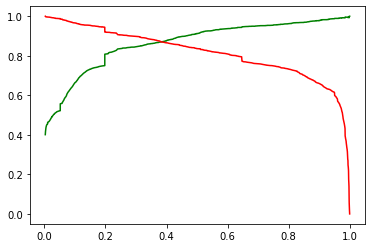

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Insights: Train set data : with 0.3 cut -off
1. Accuracy :  89%
2. Sensitivity: 89%
3. Specificity: 89%
4. precision :84%
5. Recall : 89%

#### cut off value from the trade off seems to be around 0.38 which will be considered for Test set.

### Pridictions on Test Set

In [172]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_unknown,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not opted,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not mentioned,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
3504,0,-0.068258,-0.103815,0.412150,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4050,0,-1.141305,-0.881052,-1.258878,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
7201,1,-0.425940,0.424120,-0.144859,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,0,0.289424,-0.105648,0.969160,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8219,0,1.362470,-0.428274,-0.284112,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [173]:
X_test= X_test[col_3]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Other_Tags,Tags_Will revert after reading the email,Tags_not mentioned,Last Notable Activity_SMS Sent
3504,0,-0.103815,0,0,0,0,0,0,0,0,0,0
4050,0,-0.881052,1,0,0,0,0,0,0,1,0,1
7201,1,0.424120,0,0,0,0,0,0,1,0,0,1
1196,0,-0.105648,0,0,0,0,0,0,0,0,0,0
8219,0,-0.428274,0,0,0,0,0,0,1,0,0,0


In [174]:
X_test_sm= sm.add_constant(X_test)

make pridictions on the test_test

In [175]:
y_test_pred = res.predict(X_test_sm)

In [176]:
y_test_pred[:10]

3504    0.006039
4050    0.997926
7201    0.366963
1196    0.006027
8219    0.111579
8747    0.197779
9048    0.318329
6524    0.097767
7693    0.160168
8187    0.209190
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head
y_pred_1.head()

,0
3504,0.006039
4050,0.997926
7201,0.366963
1196,0.006027
8219,0.111579


In [179]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.006039
1,1,4050,0.997926
2,0,7201,0.366963
3,0,1196,0.006027
4,1,8219,0.111579


In [184]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [185]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,3504,0.006039
1,1,4050,0.997926
2,0,7201,0.366963
3,0,1196,0.006027
4,1,8219,0.111579


In [186]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [187]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,3504,0,0.006039,1
1,4050,1,0.997926,100
2,7201,0,0.366963,37
3,1196,0,0.006027,1
4,8219,1,0.111579,11


In [188]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,3504,0,0.006039,1,0
1,4050,1,0.997926,100,1
2,7201,0,0.366963,37,0
3,1196,0,0.006027,1,0
4,8219,1,0.111579,11,0


In [189]:
### checking the overall accuracy

print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted))

0.916147931160747


In [190]:
# confusion matrix
confusion_2= metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion_2

array([[1578,  111],
       [ 118,  924]], dtype=int64)

In [191]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8867562380038387

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.9342806394316163

In [194]:
# Calculate false postive rate - predicting converted when customer dont actually get converted.
print(FP/ float(TN+FP))

0.06571936056838366


In [195]:
# positive predictive value 
print (TP / float(TP+FP))

0.8927536231884058


In [196]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9304245283018868


In [197]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8927536231884058

In [198]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8867562380038387

In [199]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,3504,0,0.006039,1,0
1,4050,1,0.997926,100,1
2,7201,0,0.366963,37,0
3,1196,0,0.006027,1,0
4,8219,1,0.111579,11,0


### Conclusion from the lead score case study

### Test set vs Train set comparison

#### Insights: Train set data : with 0.3 cut -off
Accuracy : 89%

Sensitivity: 89%

Specificity: 89%

precision :84%

Recall : 89%

#### Insights: Test set data : with 0.38 cut -off

Accuracy : 91%

Sensitivity: 88%

Specificity: 93%

precision :89%

Recall : 88%

### Final Observations from the Analysis

1. The model we choose has low p-values<0.05.

2. The model has very low VIF's <5 meaning very less multicollinearity among the variables.

3. The overall results on the Test sets seems to be good  with accuracy of 91% , Sensitivity: 88% ,Specificity: 93% ,precision :89% ,Recall : 88%

4. Based on the model we have shortlisted the variables that contribute towards potential lead conversion rate.

High positive coefficients:
 * Tags_Closed by Horizzon.
 * Tags_Will revert after reading the email.
 * Tags_Busy.	
 
Based on insights from the EDA analysis:
  
* customers who are Unemployeed are the ones who enquire more about X education online.
* working professionals tend to get converted more. 
* google and direct traffic seems to have high number of leads.
* wellingak website and reference tends to have a high conversion rate.
* leads with last activity as SMS sent tend to have high conversion rate.
* more number of leads tend to have their emails opened as the last activity.
* API and Landing page submission tend to have higher numbers and better lead conversion rate.
* Lead Add form has a higher lead conversion rate but lesser in numbers.
* customers spending more time on the website tend to convert more.

